<a href="https://colab.research.google.com/github/lifewinning/MLTSA22_final/blob/main/TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

In [2]:
import numpy as np
import pylab as pl
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from scipy import stats
from scipy.optimize import minimize
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
suez = pd.read_csv('https://raw.githubusercontent.com/lifewinning/MLTSA22_final/main/data/Suez.csv')
long_beach = pd.read_csv('https://raw.githubusercontent.com/lifewinning/MLTSA22_final/main/data/longbeach.csv')
rotterdam = pd.read_csv('https://raw.githubusercontent.com/lifewinning/MLTSA22_final/main/data/rotterdam.csv')
singapore = pd.read_csv('https://raw.githubusercontent.com/lifewinning/MLTSA22_final/main/data/singapore.csv')

In [4]:
suez.drop(columns = suez.columns[0], inplace = True)
long_beach.drop(columns = long_beach.columns[0], inplace = True)
rotterdam.drop(columns = rotterdam.columns[0], inplace = True)
singapore.drop(columns = singapore.columns[0], inplace = True)

In [5]:
suez.rename(columns = {'time':'ds'}, inplace = True);
long_beach.rename(columns = {'time':'ds'}, inplace = True);
rotterdam.rename(columns = {'time':'ds'}, inplace = True);
singapore.rename(columns = {'time':'ds'}, inplace = True);

In [6]:
suez.shape, long_beach.shape, rotterdam.shape, singapore.shape

((241, 3), (222, 3), (239, 3), (118, 3))

In [7]:
suez.head()

,ds,y,y_err
0,2018-01-04,52.0,1.0
1,2018-01-10,44.0,2.0
2,2018-01-16,40.0,2.0
3,2018-01-22,40.5,3.5
4,2018-01-28,45.0,1.0


In [8]:
long_beach.head()

,ds,y,y_err
0,2018-01-04,16.5,0.5
1,2018-01-10,19.5,0.5
2,2018-01-16,16.5,0.5
3,2018-01-22,12.0,1.0
4,2018-01-28,12.5,0.5


In [9]:
rotterdam.head()

,ds,y,y_err
0,2018-01-01,17.0,1.0
1,2018-01-07,13.0,1.0
2,2018-01-13,11.5,0.5
3,2018-01-19,17.5,1.5
4,2018-01-25,17.5,0.5


In [10]:
singapore.head()

,ds,y,y_err
0,2018-01-06,162.5,4.5
1,2018-01-18,166.5,0.5
2,2018-01-30,167.0,3.0
3,2018-02-11,178.0,1.0
4,2018-02-23,164.5,1.5


In [11]:
suez['ds'] = pd.to_datetime(suez.ds)
long_beach['ds'] = pd.to_datetime(long_beach.ds)
rotterdam['ds'] = pd.to_datetime(rotterdam.ds)
singapore['ds'] = pd.to_datetime(singapore.ds)

In [12]:
suez.describe()

,y,y_err
count,241.000000,241.000000
mean,42.572614,1.535270
std,8.038055,1.017452
min,3.000000,0.000000
25%,38.000000,1.000000
50%,42.500000,1.500000
75%,47.000000,2.000000
max,71.000000,5.500000


Text(0.5, 1.0, 'Singapore')

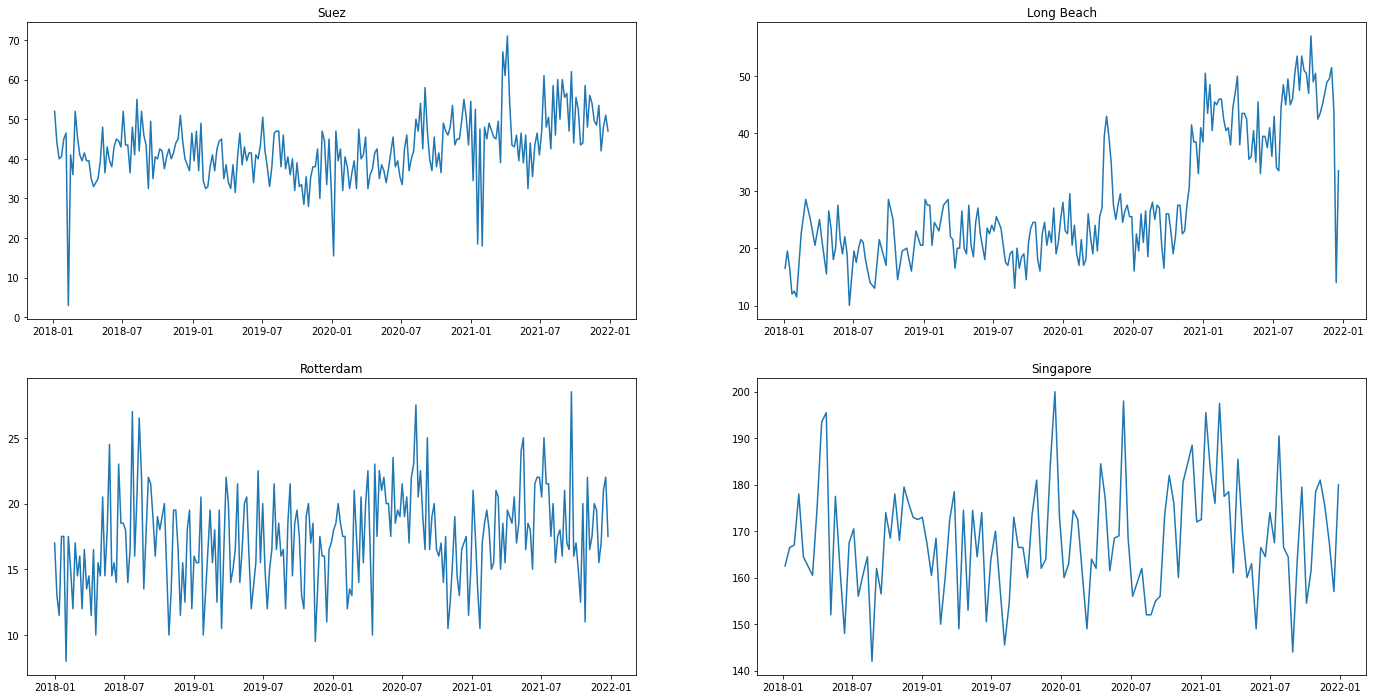

In [13]:
fig0, ax = pl.subplots(2, 2, figsize=(24,12))
ax[0,0].plot(suez.ds, suez.y)
ax[0,0].set_title("Suez")
ax[0,1].plot(long_beach.ds, long_beach.y)
ax[0,1].set_title("Long Beach")
ax[1,0].plot(rotterdam.ds, rotterdam.y)
ax[1,0].set_title("Rotterdam")
ax[1,1].plot(singapore.ds, singapore.y)
ax[1,1].set_title("Singapore")

**Fig 1.** Timeseries plot for each port

We will test for stationarity of the time series

In [14]:
print(sm.tsa.stattools.adfuller(suez.y.values)[1] < 0.05)
print(sm.tsa.stattools.adfuller(long_beach.y.values)[1] < 0.05)
print(sm.tsa.stattools.adfuller(rotterdam.y.values)[1] < 0.05)
print(sm.tsa.stattools.adfuller(singapore.y.values)[1] < 0.05)

True
False
True
True


The AD fuller test suggests that the port of Long Beach is non stationary in its behavior.

In [15]:
# Let's standardize first our data
suez['y'] = preprocessing.scale(suez.y)
suez['y_err'] = preprocessing.scale(suez.y_err)

long_beach['y'] = preprocessing.scale(long_beach.y)
long_beach['y_err'] = preprocessing.scale(long_beach.y_err)

rotterdam['y'] = preprocessing.scale(rotterdam.y)
rotterdam['y_err'] = preprocessing.scale(rotterdam.y_err)

singapore['y'] = preprocessing.scale(singapore.y)
singapore['y_err'] = preprocessing.scale(singapore.y_err)

In [16]:
singapore.head()

,ds,y,y_err
0,2018-01-06,-0.517950,0.746499
1,2018-01-18,-0.184427,-1.278487
2,2018-01-30,-0.142736,-0.012871
3,2018-02-11,0.774451,-1.025364
4,2018-02-23,-0.351188,-0.772241


In [17]:
m_suez = Prophet().fit(suez[['ds','y']])
m_long_beach = Prophet().fit(long_beach[['ds','y']])
m_rotterdam = Prophet().fit(rotterdam[['ds','y']])
m_singapore = Prophet().fit(singapore[['ds','y']])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
simplem_sz= m_suez.predict(suez[['ds','y']])
simplem_lb = m_long_beach.predict(long_beach[['ds','y']])
simplem_rt = m_rotterdam.predict(rotterdam[['ds','y']])
simplem_sp = m_singapore.predict(singapore[['ds','y']])

Text(0.5, 1.0, 'Singapore')

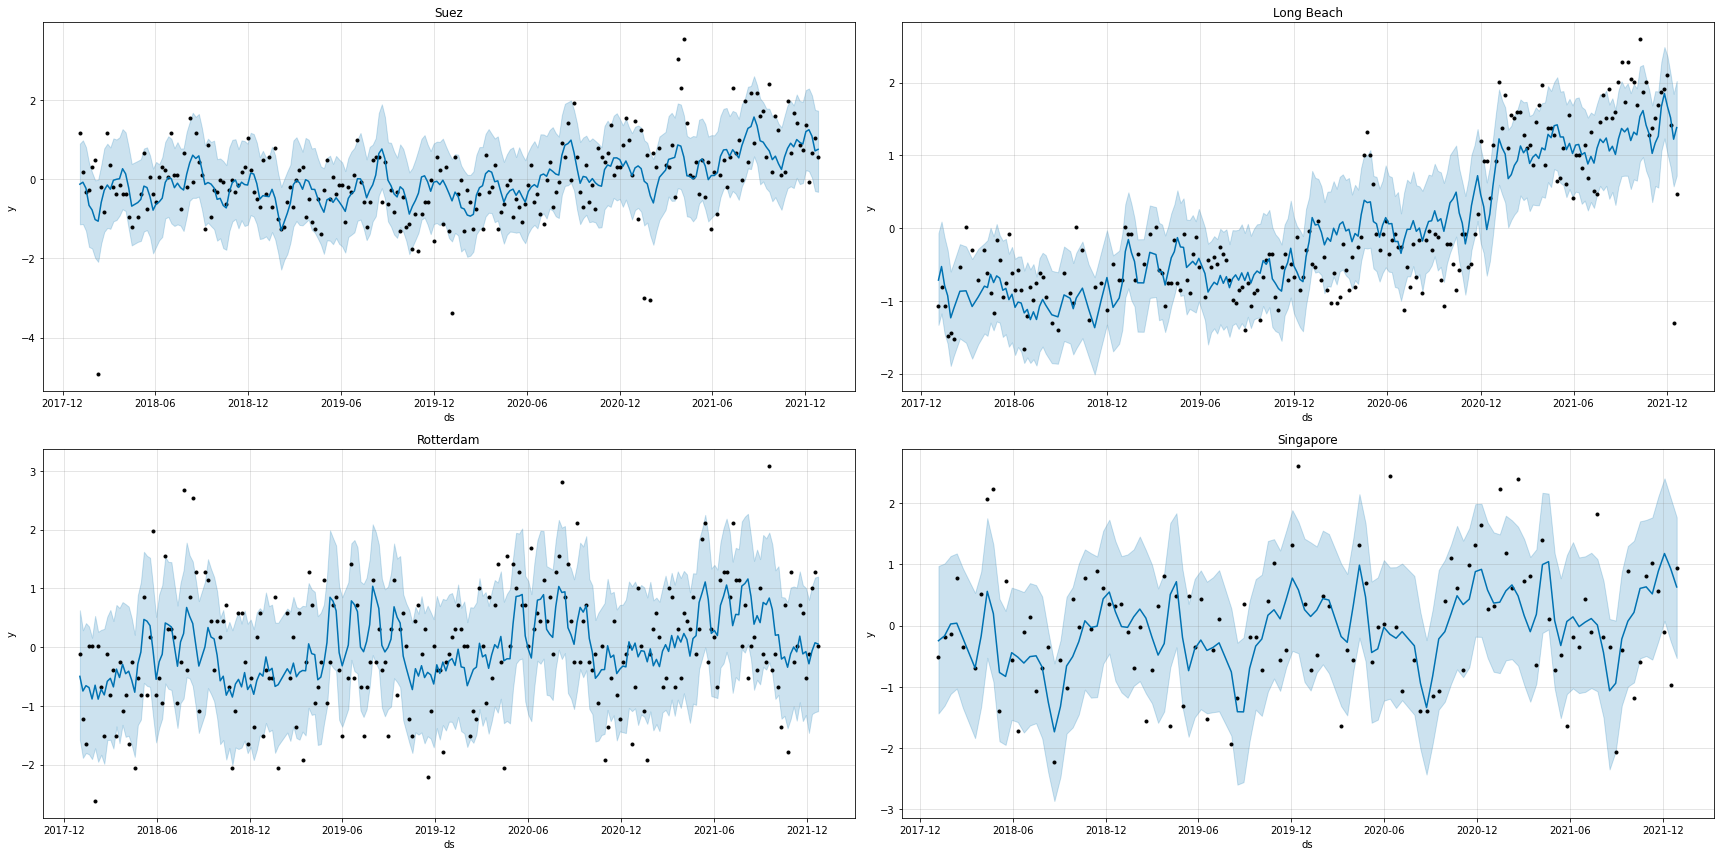

In [19]:
fig1, ax = pl.subplots(2, 2, figsize = (24,12))
m_suez.plot(simplem_sz, ax = ax[0,0]);
ax[0,0].set_title("Suez")
m_long_beach.plot(simplem_lb, ax = ax[0,1]);
ax[0,1].set_title("Long Beach")
m_rotterdam.plot(simplem_rt, ax = ax[1,0]);
ax[1,0].set_title("Rotterdam")
m_singapore.plot(simplem_sp, ax = ax[1,1]);
ax[1,1].set_title("Singapore")
#pl.plot(suez.ds, suez.y, '--r')

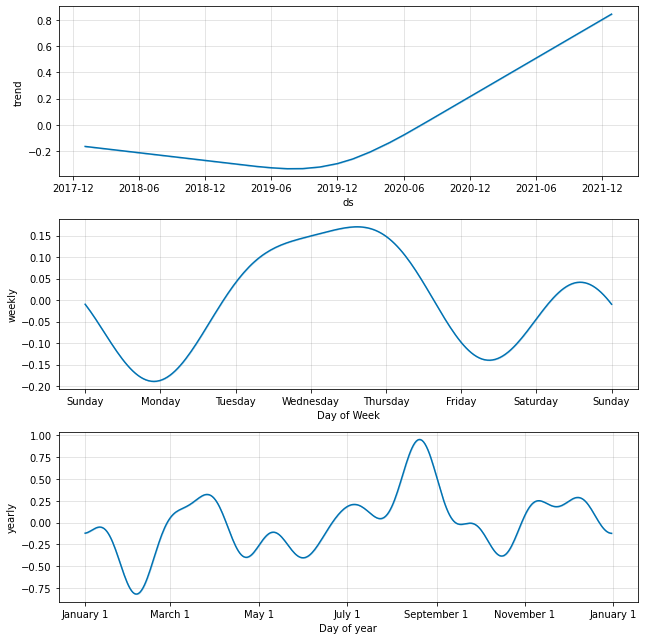

In [20]:
fig2 = m_suez.plot_components(simplem_sz)

Seasonality components suez canal

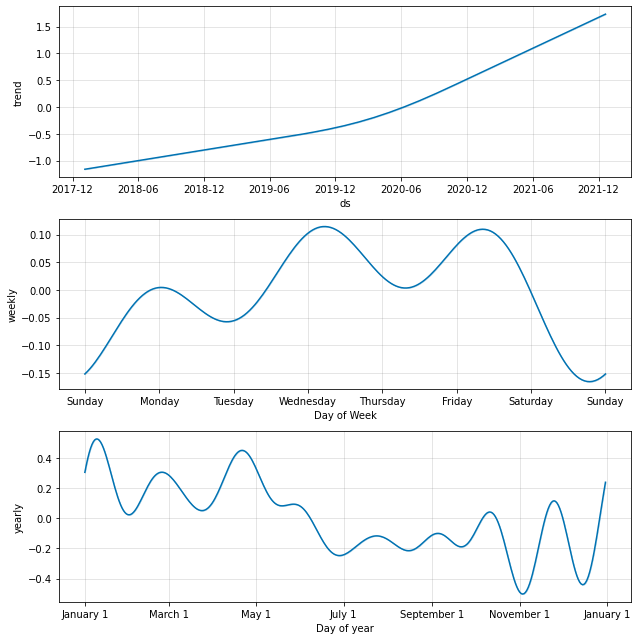

In [21]:
fig2 = m_long_beach.plot_components(simplem_lb)

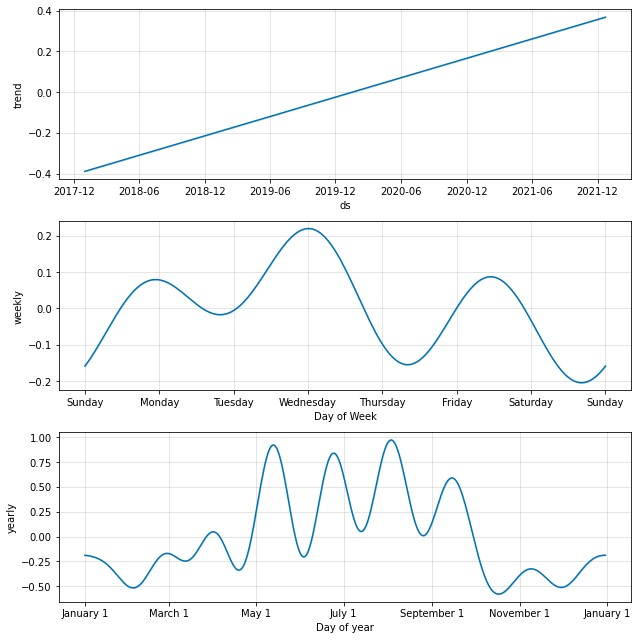

In [22]:
fig2 = m_rotterdam.plot_components(simplem_rt)

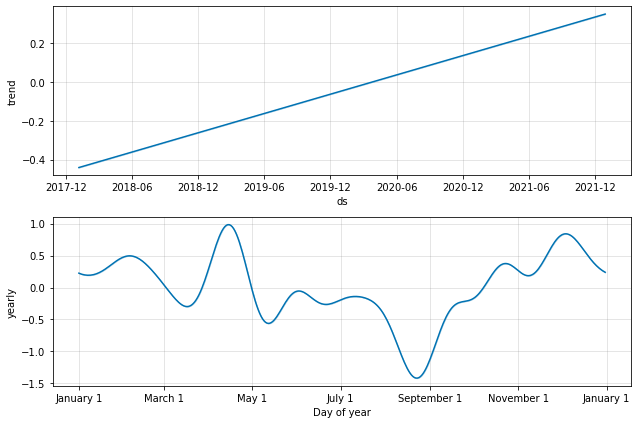

In [23]:
fig2 = m_singapore.plot_components(simplem_sp)

Read the covid dataset and select the countries relevant for each port.
An alternative approach will use the global number of covid cases for all ports.

We should discuss if the relevant number is the new cases or the cumulative cases

In [24]:
covid = pd.read_csv('https://raw.githubusercontent.com/lifewinning/MLTSA22_final/main/data/WHO-COVID-19-global-data.csv')

In [25]:
covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [26]:
covid.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [27]:
covid.Country_code.unique()

array(['AF', 'AL', 'DZ', 'AS', 'AD', 'AO', 'AI', 'AG', 'AR', 'AM', 'AW',
       'AU', 'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ',
       'BM', 'BT', 'BO', 'XA', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG', 'BF',
       'BI', 'CV', 'KH', 'CM', 'CA', 'KY', 'CF', 'TD', 'CL', 'CN', 'CO',
       'KM', 'CG', 'CK', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'KP',
       'CD', 'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE',
       'SZ', 'ET', 'FK', 'FO', 'FJ', 'FI', 'FR', 'GF', 'PF', 'GA', 'GM',
       'GE', 'DE', 'GH', 'GI', 'GR', 'GL', 'GD', 'GP', 'GU', 'GT', 'GG',
       'GN', 'GW', 'GY', 'HT', 'VA', 'HN', 'HU', 'IS', 'IN', 'ID', 'IR',
       'IQ', 'IE', 'IM', 'IL', 'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE',
       'KI', 'XK', 'KW', 'KG', 'LA', 'LV', 'LB', 'LS', 'LR', 'LY', 'LI',
       'LT', 'LU', 'MG', 'MW', 'MY', 'MV', 'ML', 'MT', 'MH', 'MQ', 'MR',
       'MU', 'YT', 'MX', 'FM', 'MC', 'MN', 'ME', 'MS', 'MA', 'MZ', 'MM',
       nan, 'NR', 'NP', 'NL', 'NC', 'NZ', 'NI', 'NE

In [28]:
covid['Date_reported'] = pd.to_datetime(covid.Date_reported)
covid.rename(columns = {'Date_reported':'ds'}, inplace = True)

In [29]:
eg_covid = covid[covid.Country_code == 'EG']
us_covid = covid[covid.Country_code == 'US']
nl_covid = covid[covid.Country_code == 'NL']
sg_covid = covid[covid.Country_code == 'SG']

In [30]:
sg_covid.head()

,ds,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
160576,2020-01-03,SG,Singapore,WPRO,0,0,0,0
160577,2020-01-04,SG,Singapore,WPRO,0,0,0,0
160578,2020-01-05,SG,Singapore,WPRO,0,0,0,0
160579,2020-01-06,SG,Singapore,WPRO,0,0,0,0
160580,2020-01-07,SG,Singapore,WPRO,0,0,0,0


In [31]:
eg_covid.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,832.000000,832.000000,832.000000,832.000000
mean,615.356971,197071.682692,29.473558,10880.975962
std,585.329151,148530.652672,22.524313,7956.433740
min,0.000000,0.000000,0.000000,0.000000
25%,131.000000,92830.750000,11.000000,4681.250000
50%,578.000000,177847.000000,26.000000,10325.500000
75%,909.000000,295198.000000,47.000000,16924.500000
max,5516.000000,511977.000000,97.000000,24522.000000


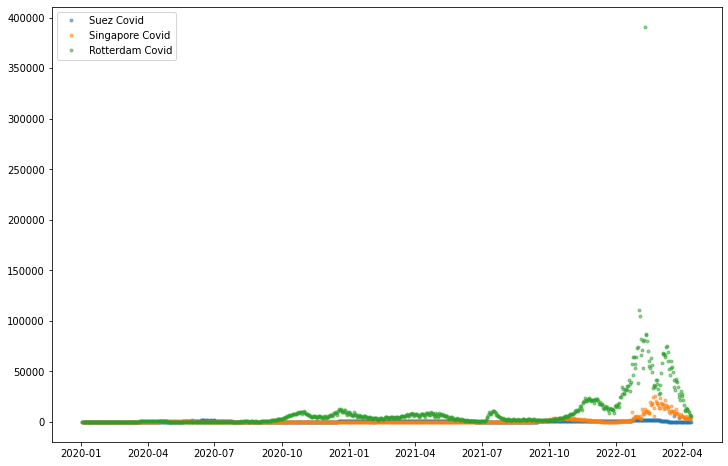

In [32]:
fig0 = pl.figure(figsize = (12,8))
pl.plot(eg_covid.ds, eg_covid.New_cases, '.', label = 'Suez Covid', alpha = 0.5)
pl.plot(sg_covid.ds, sg_covid.New_cases, '.', label = 'Singapore Covid', alpha = 0.5)
#pl.plot(us_covid.ds, us_covid.New_cases, '.', label = 'US Covid', alpha = 0.5)
pl.plot(nl_covid.ds, nl_covid.New_cases, '.', label = 'Rotterdam Covid', alpha = 0.5)
pl.legend()

In [33]:
suez_covid = pd.merge(suez,eg_covid.drop(['Country_code','Country', 'WHO_region'], axis = 1), on= 'ds', how = 'left')
long_beach_covid = pd.merge(long_beach,us_covid.drop(['Country_code','Country', 'WHO_region'], axis = 1), on= 'ds', how = 'left')
rotterdam_covid = pd.merge(rotterdam,nl_covid.drop(['Country_code','Country', 'WHO_region'], axis = 1), on= 'ds', how = 'left')
singapore_covid = pd.merge(singapore,sg_covid.drop(['Country_code','Country', 'WHO_region'], axis = 1), on= 'ds', how = 'left')

In [34]:
suez_covid.head()

,ds,y,y_err,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2018-01-04,1.175285,-0.527183,NaN,NaN,NaN,NaN
1,2018-01-10,0.177948,0.457709,NaN,NaN,NaN,NaN
2,2018-01-16,-0.320720,0.457709,NaN,NaN,NaN,NaN
3,2018-01-22,-0.258387,1.935048,NaN,NaN,NaN,NaN
4,2018-01-28,0.302615,-0.527183,NaN,NaN,NaN,NaN


In [35]:
suez_covid.shape, long_beach_covid.shape, rotterdam_covid.shape, singapore_covid.shape

((241, 7), (222, 7), (239, 7), (118, 7))

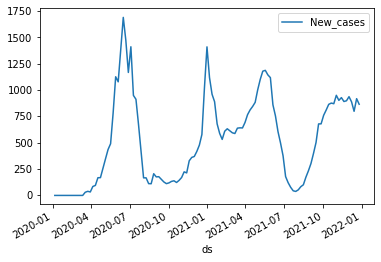

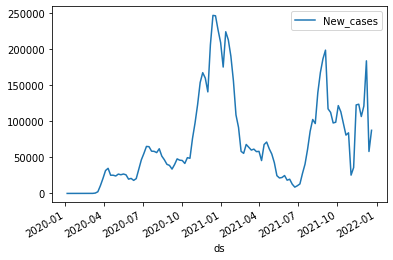

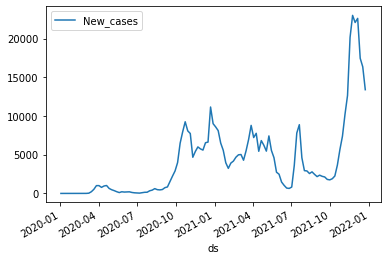

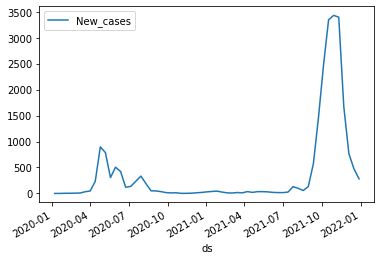

In [36]:
suez_covid.plot(x = 'ds', y = 'New_cases')
long_beach_covid.plot(x = 'ds', y = 'New_cases')
rotterdam_covid.plot(x = 'ds', y = 'New_cases')
singapore_covid.plot(x = 'ds', y = 'New_cases')

In [37]:
suez_covid['New_cases'] =  suez_covid['New_cases'].fillna(0)
long_beach_covid['New_cases'] =  long_beach_covid['New_cases'].fillna(0)
rotterdam_covid['New_cases'] =  rotterdam_covid['New_cases'].fillna(0)
singapore_covid['New_cases'] =  singapore_covid['New_cases'].fillna(0)

Model adding the number of new covid cases in Egypt

In [38]:
m_covid = Prophet()

In [39]:
m_covid.add_country_holidays(country_name='EG')
m_covid.add_regressor('New_cases')

In [40]:
#m_covid.fit(eg_covid.drop(['Cumulative_cases', 'New_deaths', 'Cumulative_deaths'], axis = 1))
m_covid.fit(suez_covid)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
predict_covid = m_covid.predict(suez_covid)

Text(73.25, 0.5, '# Ships')

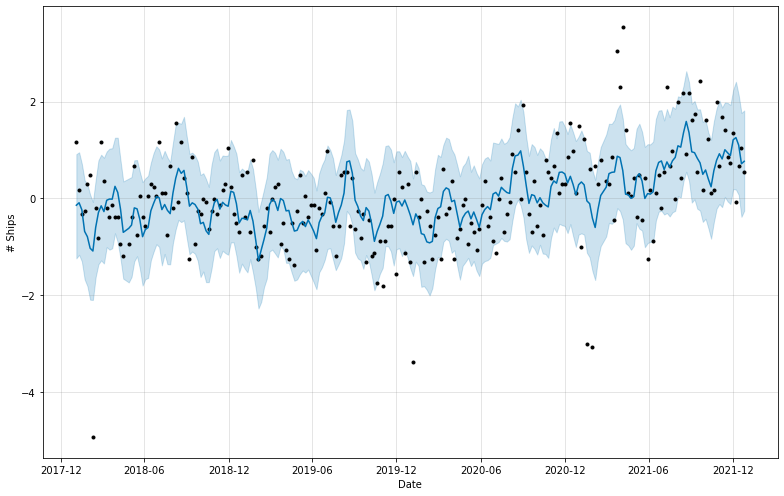

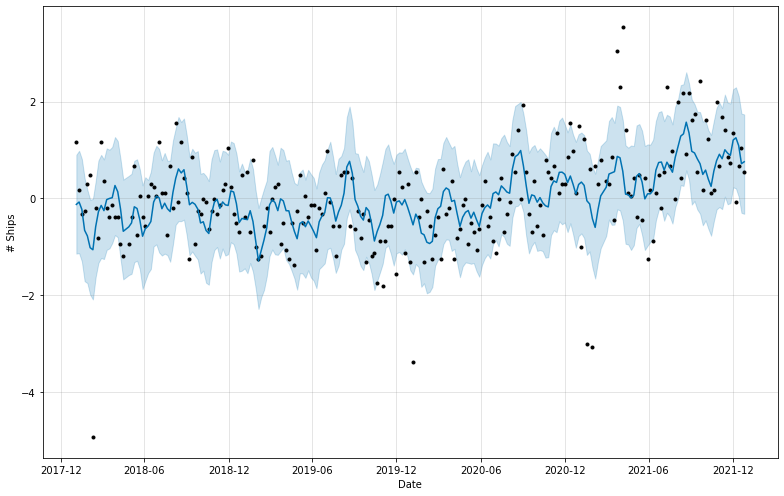

In [42]:
fig1 = m_covid.plot(predict_covid, figsize = (11, 7));
#a = add_changepoints_to_plot(fig1.gca(), m_covid, predict_covid)
#pl.plot(suez.ds, suez.y, '--r')
pl.xlabel('Date')
pl.ylabel('# Ships')
fig1 = m_suez.plot(simplem_sz, figsize = (11, 7));
#pl.plot(suez.ds, suez.y, '--r')
pl.xlabel('Date')
pl.ylabel('# Ships')

In [43]:
m_covid_rot = Prophet()

In [44]:
m_covid_rot.add_country_holidays(country_name='NL')
m_covid_rot.add_regressor('New_cases')

In [45]:
m_covid_rot.fit(rotterdam_covid)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
predict_covid_rot = m_covid_rot.predict(rotterdam_covid)

Text(73.25, 0.5, '# Ships')

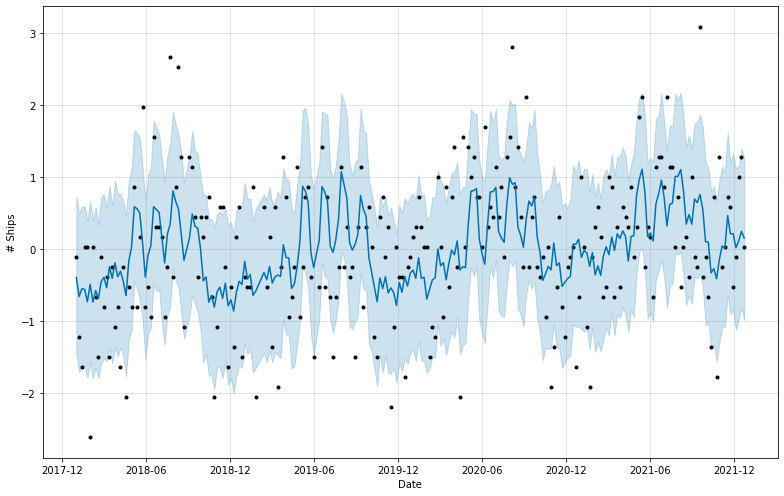

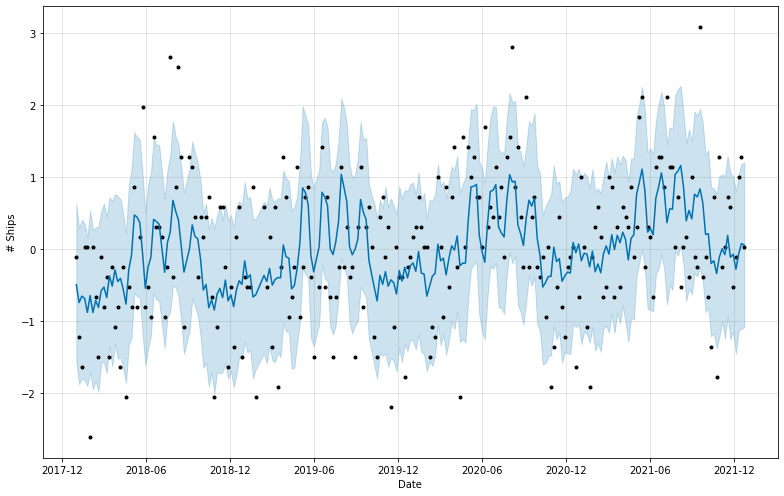

In [47]:
fig1 = m_covid_rot.plot(predict_covid_rot, figsize = (11, 7));
#a = add_changepoints_to_plot(fig1.gca(), m_covid, predict_covid)
#pl.plot(suez.ds, suez.y, '--r')
pl.xlabel('Date')
pl.ylabel('# Ships')
fig1 = m_rotterdam.plot(simplem_rt, figsize = (11, 7));
#pl.plot(suez.ds, suez.y, '--r')
pl.xlabel('Date')
pl.ylabel('# Ships')

In [48]:
m_covid_lb = Prophet()

In [49]:
m_covid_lb.add_country_holidays(country_name='US')
m_covid_lb.add_regressor('New_cases')

In [50]:
m_covid_lb.fit(long_beach_covid)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
predict_covid_lb = m_covid_lb.predict(long_beach_covid)

Text(73.25, 0.5, '# Ships')

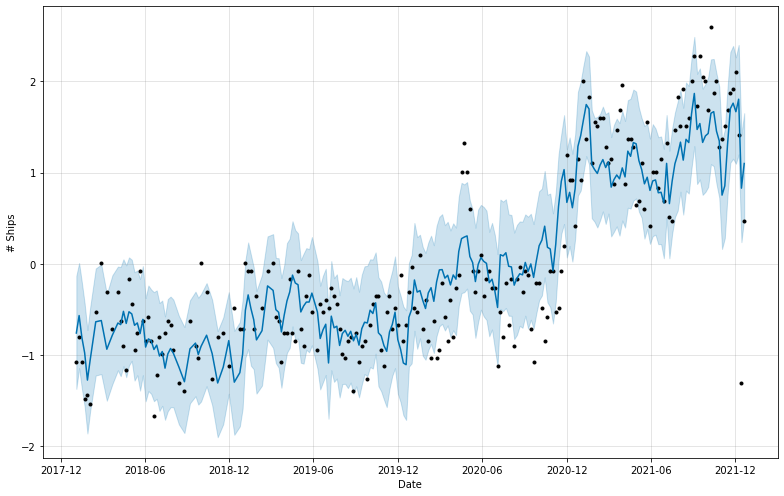

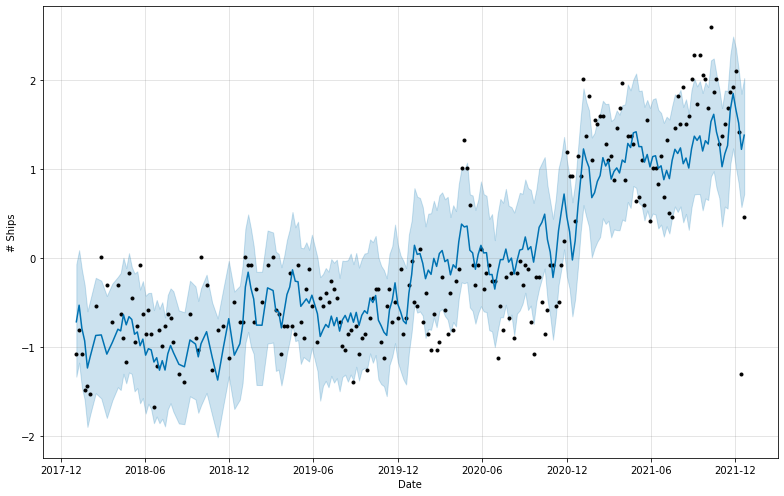

In [52]:
fig1 = m_covid_lb.plot(predict_covid_lb, figsize = (11, 7));
#a = add_changepoints_to_plot(fig1.gca(), m_covid, predict_covid)
#pl.plot(suez.ds, suez.y, '--r')
pl.xlabel('Date')
pl.ylabel('# Ships')
fig1 = m_long_beach.plot(simplem_lb, figsize = (11, 7));
#pl.plot(suez.ds, suez.y, '--r')
pl.xlabel('Date')
pl.ylabel('# Ships')

In [53]:
m_covid_sp = Prophet()

In [55]:
#m_covid_sp.add_country_holidays(country_name='SG')
m_covid_sp.add_regressor('New_cases')

In [56]:
m_covid_sp.fit(singapore_covid)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
predict_covid_sp = m_covid_sp.predict(singapore_covid)

Text(73.25, 0.5, '# Ships')

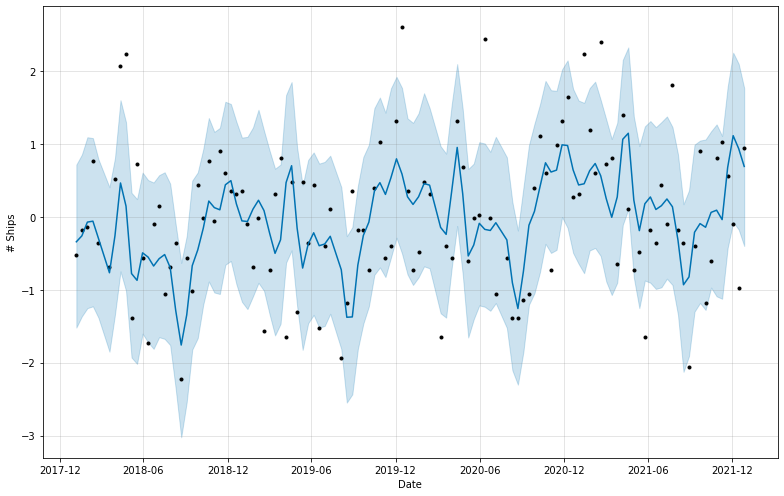

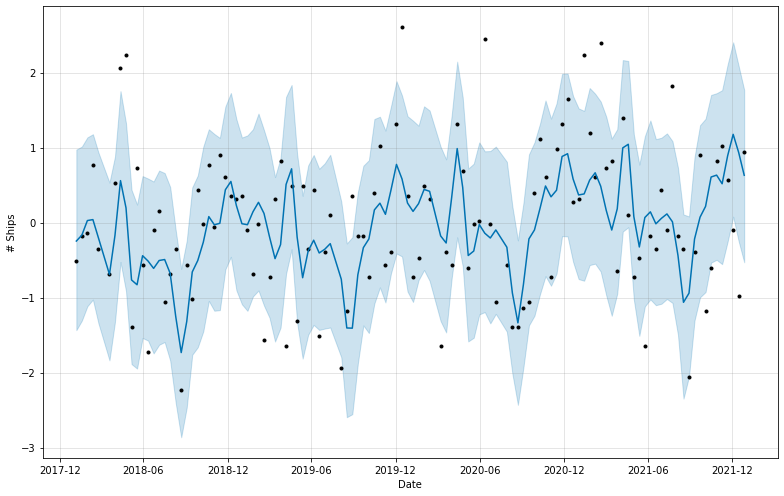

In [58]:
fig1 = m_covid_sp.plot(predict_covid_sp, figsize = (11, 7));
#a = add_changepoints_to_plot(fig1.gca(), m_covid, predict_covid)
#pl.plot(suez.ds, suez.y, '--r')
pl.xlabel('Date')
pl.ylabel('# Ships')
fig1 = m_singapore.plot(simplem_sp, figsize = (11, 7));
#pl.plot(suez.ds, suez.y, '--r')
pl.xlabel('Date')
pl.ylabel('# Ships')